In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [2]:
print(tf.__version__)

2.10.1


In [3]:
train_dir = "D:/Projects/MLOps/archive/seg_train/seg_train/"
test_dir = "D:/Projects/MLOps/archive/seg_test/seg_test/"
pred_dir = "D:/Projects/MLOps/archive/seg_pred/seg_pred/"

In [24]:
import os
# Walk through pizza_steak directory and list number of files
print("Train data: ")
for dirpath, dirnames, filenames in os.walk(train_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Walk through test directory and list number of files
print("Test data: ")
for dirpath, dirnames, filenames in os.walk(test_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Walk through prediction directory and list number of files
print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk(pred_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/'.
There are 0 directories and 2191 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/buildings'.
There are 0 directories and 2271 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/forest'.
There are 0 directories and 2404 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/glacier'.
There are 0 directories and 2512 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/mountain'.
There are 0 directories and 2274 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/sea'.
There are 0 directories and 2382 images in 'D:/Projects/MLOps/archive/seg_train/seg_train/street'.
Test data: 
There are 6 directories and 0 images in 'D:/Projects/MLOps/archive/seg_test/seg_test/'.
There are 0 directories and 437 images in 'D:/Projects/MLOps/archive/seg_test/seg_test/buildings'.
There are 0 directories and 474 images in 'D:/Projects/MLOps/archive/seg_test/seg_test/forest'.
There

In [25]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
  # We will view image from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")

  return img

Image shape (150, 150, 3)


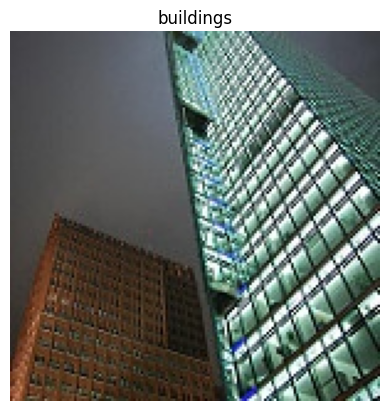

In [26]:
img = view_random_image(target_dir = 'D:/Projects/MLOps/archive/seg_train/seg_train/', target_class='buildings')

In [27]:
# Get the class name programmatically
import pathlib
data_dir = pathlib.Path("D:/Projects/MLOps/archive/seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


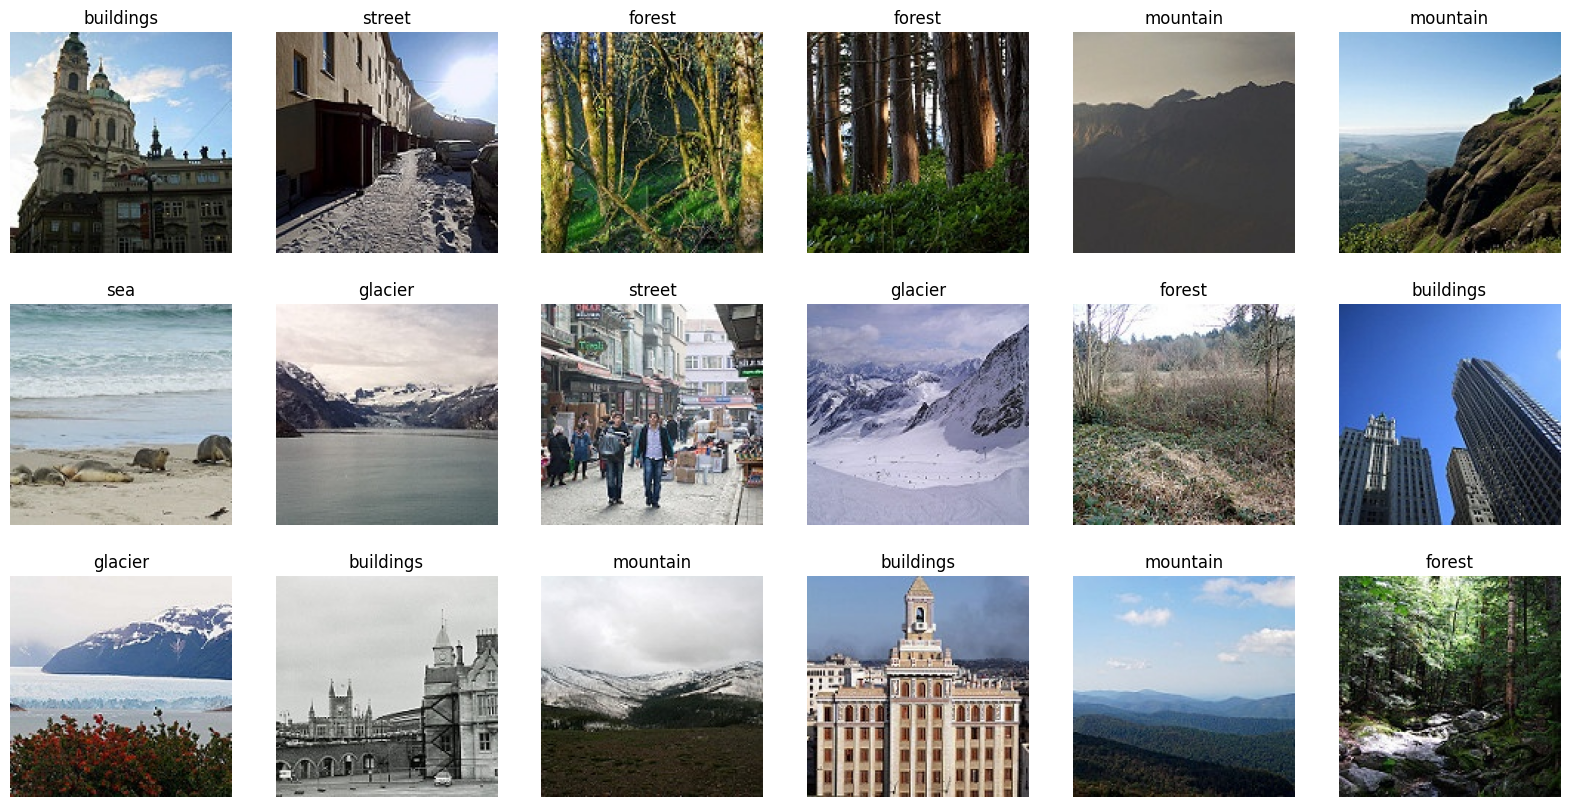

In [30]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir="D:/Projects/MLOps/archive/seg_train/seg_train/", target_class=class_name)

Prepare data for model

In [29]:
# Create augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Basic model Buildinig (CNN Classifier)

In [31]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [32]:

history_1 = model_1.fit(train_data,
                    epochs=4,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/4
439/439 [==============================] - 244s 552ms/step - loss: 1.0633 - accuracy: 0.5757 - val_loss: 0.8385 - val_accuracy: 0.6940
Epoch 2/4
439/439 [==============================] - 124s 283ms/step - loss: 0.8344 - accuracy: 0.6834 - val_loss: 0.7325 - val_accuracy: 0.7163
Epoch 3/4
439/439 [==============================] - 122s 278ms/step - loss: 0.6995 - accuracy: 0.7416 - val_loss: 0.7198 - val_accuracy: 0.7167
Epoch 4/4
439/439 [==============================] - 122s 278ms/step - loss: 0.6318 - accuracy: 0.7676 - val_loss: 0.6519 - val_accuracy: 0.7723


In [33]:
model_1.evaluate(test_data)

94/94 [==============================] - 5s 54ms/step - loss: 0.6519 - accuracy: 0.7723


[0.651912271976471, 0.7723333239555359]

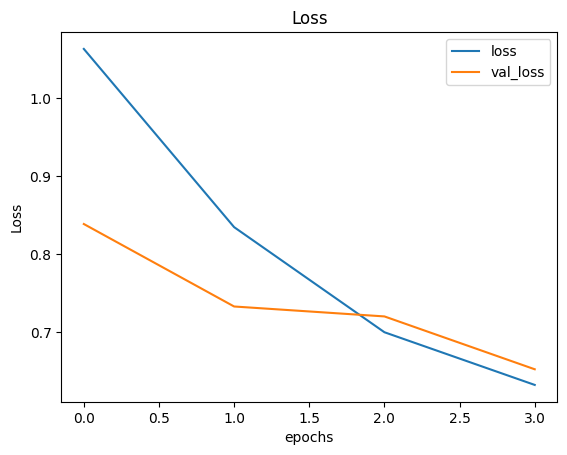

In [34]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

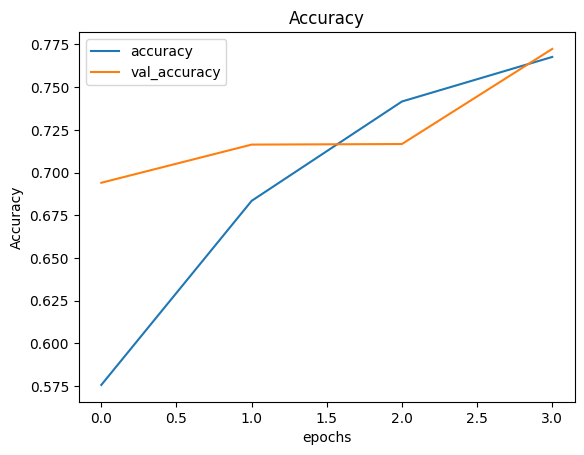

In [35]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [37]:
model_1.save('D:/Projects/MLOps/models/', save_format='tf')

INFO:tensorflow:Assets written to: D:/Projects/MLOps/models/assets


INFO:tensorflow:Assets written to: D:/Projects/MLOps/models/assets


In [40]:
!dir models

 Volume in drive D is New Volume
 Volume Serial Number is 4ACA-05AE

 Directory of D:\Projects\MLOps\models

02-03-2024  18:35    <DIR>          .
02-03-2024  18:37    <DIR>          ..
02-03-2024  18:35    <DIR>          assets
02-03-2024  18:35            20,057 keras_metadata.pb
02-03-2024  18:35           160,479 saved_model.pb
02-03-2024  18:35    <DIR>          variables
               2 File(s)        180,536 bytes
               4 Dir(s)  310,595,076,096 bytes free


In [4]:
model_loaded = tf.keras.models.load_model('D:/Projects/MLOps/models/')
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [7]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [11]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [12]:
pred_label=model_loaded.predict(process("D:/Projects/MLOps/alto-crew-Rv3ecImL4ak-unsplash.jpg"))
print(classes[np.argmax(pred_label)])

1/1 [==============================] - 0s 36ms/step
glacier


In [10]:
pred_label

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [15]:
import shutil
shutil.make_archive('models', 'zip', 'models/')

'D:\\Projects\\MLOps\\models.zip'